In [33]:
import  torch
from  torch.utils.data import DataLoader
import torch.nn as nn
import DataSet_2
import math
import Model_2

In [2]:
FaceData=DataSet_2.TorchFacialFeaturesDataset();

In [3]:
generator=torch.Generator().manual_seed(699)
train_size = int(0.85 * len(FaceData))
test_size = len(FaceData) - train_size
train_dataset, test_dataset = torch.utils.data.random_split(FaceData, [train_size, test_size],generator=generator)


In [4]:
model=Model_2.MLP(9216,30).double()

In [32]:
model(train_dataset[0][0])

tensor([ 0.1252, -0.0611, -0.0778, -0.1020, -0.0603, -0.1556,  0.0501, -0.0044,
         0.0668,  0.0761,  0.0748,  0.0150, -0.1276,  0.0301,  0.0513, -0.0539,
        -0.0468, -0.0281,  0.1333,  0.0595, -0.0111,  0.1273, -0.0378,  0.0172,
        -0.0765, -0.1136, -0.0991, -0.0538, -0.0464,  0.0490],
       dtype=torch.float64, grad_fn=<ViewBackward0>)

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
dataloader = DataLoader(train_dataset, batch_size=20, shuffle=True, num_workers=2)
epochs=50
learning_rate=0.005
samples=len(train_dataset)
batches=math.ceil(samples/20)

criterion = nn.MSELoss().double()
optimizer = torch.optim.Adam(model.parameters(),lr=learning_rate)


In [40]:

for epoch in range(epochs):
    for i,(inputs,labels) in enumerate(dataloader):
        
        #forward
        outputs = model(inputs)
        loss=criterion(outputs,labels)
        
        #backward
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        if (epoch+1)%5==0:
            print(f'Epoch {epoch+1}/{epochs} step {i+1}/{batches} input {inputs.shape} loss={loss.item()}')
        
        

Epoch 5/50 step 1/182 input torch.Size([20, 9216]) loss=0.0030233855457286385
Epoch 5/50 step 2/182 input torch.Size([20, 9216]) loss=0.0025854632820996744
Epoch 5/50 step 3/182 input torch.Size([20, 9216]) loss=0.004939098336118327
Epoch 5/50 step 4/182 input torch.Size([20, 9216]) loss=0.003871810255785804
Epoch 5/50 step 5/182 input torch.Size([20, 9216]) loss=0.003541629215263632
Epoch 5/50 step 6/182 input torch.Size([20, 9216]) loss=0.004218273587123401
Epoch 5/50 step 7/182 input torch.Size([20, 9216]) loss=0.004039619646761879
Epoch 5/50 step 8/182 input torch.Size([20, 9216]) loss=0.002871099585693139
Epoch 5/50 step 9/182 input torch.Size([20, 9216]) loss=0.0044145085768724605
Epoch 5/50 step 10/182 input torch.Size([20, 9216]) loss=0.0032411593118959986
Epoch 5/50 step 11/182 input torch.Size([20, 9216]) loss=0.005004152808108297
Epoch 5/50 step 12/182 input torch.Size([20, 9216]) loss=0.0027618947565028855
Epoch 5/50 step 13/182 input torch.Size([20, 9216]) loss=0.004052667

In [46]:
((model(train_dataset[0][0])+1)*48)

tensor([66.9481, 38.0736, 28.9844, 37.9417, 59.3541, 39.1691, 74.8273, 39.0562,
        36.4893, 39.0866, 21.0965, 38.7862, 56.0969, 30.6693, 81.9332, 31.3742,
        40.2707, 30.7186, 14.2310, 31.1085, 47.8646, 60.1986, 63.9137, 79.9805,
        31.4476, 79.7746, 47.7049, 77.3477, 47.6746, 86.2930],
       dtype=torch.float64, grad_fn=<MulBackward0>)

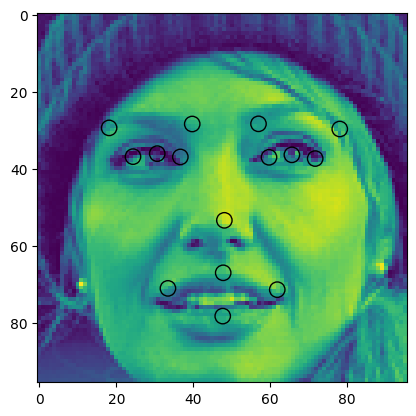

In [66]:
# test set prediction visualization
import matplotlib.pyplot as plt
import matplotlib.patches as patches
Pred=(model(test_dataset[0][0]).detach().numpy()+1)*48
Im=test_dataset[0][0].numpy().reshape(96,96)
fig,ax=plt.subplots(1)
ax.imshow(Im)
for i in range(0,30,2):
    circ=patches.Circle((Pred[i],Pred[i+1]),fill=False,radius=2)
    ax.add_patch(circ)
plt.show()

In [84]:
torch.save(optimizer.state_dict(),"Model2Optimizer.pth")
torch.save(model.state_dict(),"Model2Model.pth")